# Data Dictionary
    Variable	Definition	                                        Key
    survival	Survival	                                        0 = No, 1 = Yes
    pclass	    Ticket class                                  	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	        Sex	
    Age	        Age in years	
    sibsp	    # of siblings / spouses aboard the Titanic	
    parch	    # of parents / children aboard the Titanic	
    ticket	    Ticket number	
    fare	    Passenger fare	
    cabin	    Cabin number	
    embarked	Port of Embarkation	                                C = Cherbourg, Q = Queenstown, S = Southampton
    

   ## Variable Notes
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson

    Some children travelled only with a nanny, therefore parch=0 for them.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import Data from file location

In [138]:
os.chdir(r"C:\Users\Lokesh\Programing - Lokesh\DataScience\Udemey\DATA") # change directory to file path

In [139]:
df = pd.read_csv("titanic - train.csv")

## Basic Analysis

In [140]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


     * Found 891 records with 12 column values
     * some missing values in column "Cabin","Age","Embarked"

# Data analysis using Dtype

In [142]:
df.select_dtypes(include='float64')

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


    * "Fare" value and "Age" should be scaledown
    *  Age 19.87% data is Nan

In [143]:
df.select_dtypes(include='int64')

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [144]:
df.groupby(by='Parch').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [145]:
for col in df.select_dtypes(include='object').columns:
    print(col,": ",df[col].nunique(),"Unique values")
    print("**************************************************************************************")
    print(df[col].value_counts())
    print("**************************************************************************************")

Name :  891 Unique values
**************************************************************************************
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
**************************************************************************************
Sex :  2 Unique values
**************************************************************************************
male      577
female    314
Name: Sex, dtype: int64
**************************************************************************************
Ticket 

In [146]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object
Unique,891,2,3,891,2,88,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64


<AxesSubplot:>

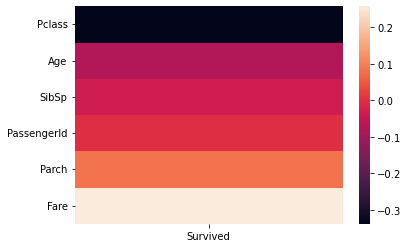

In [147]:
#finding corelation b/w "survived" with others

#Fare is strong corlation with survive

print(df.corr()["Survived"].sort_values())

sns.heatmap(pd.DataFrame(df.corr()["Survived"].sort_values())[:-1])

In [148]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [149]:
df.isnull().sum()[df.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# OBSERVATIONS:

    * Found "PassengerId", "Name" columns are Unique values. hence those colums need to be drop.
    * Totally we have 891 recoards with diff 12 column values.
    * Found dtypes : float64(2), int64(5), object(5).
    * In dtype - object(5) found "Sex, "Embarked" are catagorial values.
    * More then 75% of "Cabin" are NaN.
    * We seen the strong co-relatoin between "Survived" & "Fare"
    * for missing Age we can find based on "Parch"

In [150]:
df = df.drop(["PassengerId", "Name"], axis=1) #dropped due to unique values

In [151]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,object,float64,object,object
Unique,2,3,2,88,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22


# Feature Engineering

Missing-Data

In [152]:
#based on parch person age and will change, hence 19.87% of missing values filled with based on Parch

df.groupby(by="Parch").mean()['Age']


Parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: Age, dtype: float64

In [153]:
df['Age'] = df['Age'].fillna(df.groupby('Parch')['Age'].transform('mean'))

In [160]:
df.groupby(by='Embarked').mean()[['Fare','Pclass']]

,Fare,Pclass
Embarked,,
C,59.954144,1.886905
Q,13.276030,2.909091
S,27.243651,2.346749


    'Embarked' have strong connection b/w 'Fare','Pclass'

    but we can fin the clear indication based on Ticket Number

In [161]:
df[df["Fare"].between(79,83)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
34,0,1,male,28.000000,1,0,PC 17604,82.1708,NaN,C
61,1,1,female,38.000000,0,0,113572,80.0000,B28,S
139,0,1,male,24.000000,0,0,PC 17593,79.2000,B86,C
256,1,1,female,32.178503,0,0,PC 17585,79.2000,NaN,C
262,0,1,male,52.000000,1,1,110413,79.6500,E67,S
375,1,1,female,32.178503,1,0,PC 17604,82.1708,NaN,C
445,1,1,male,4.000000,0,2,33638,81.8583,A34,S
558,1,1,female,39.000000,1,1,110413,79.6500,E67,S
585,1,1,female,18.000000,0,2,110413,79.6500,E68,S
587,1,1,male,60.000000,1,1,13567,79.2000,B41,C


In [155]:
df['Embarked'].fillna("S",inplace=True)

    based on ticket number we can fill the Ebbarked as "s" value

In [162]:
temp = {col:[df[col].dtype, df[col].nunique(), round(100*df[col].isnull().sum()/len(df[col]),2)] for col in df}
temp_df = pd.DataFrame(data=temp,index=["Dtype","Unique","Missing_%"])
temp_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,object,float64,object,object
Unique,2,3,2,91,7,7,681,248,147,3
Missing_%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.1,0.0


Outliers

Categorical-Data

# EDA

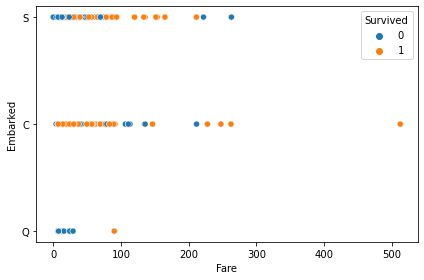

In [44]:
#plt.figure(figsize=(6,4),dpi=150)
sns.scatterplot(data=df,y="Embarked",x="Fare",hue="Survived")
#plt.xticks(rotation = 90)
plt.tight_layout();

<AxesSubplot:xlabel='Survived', ylabel='count'>

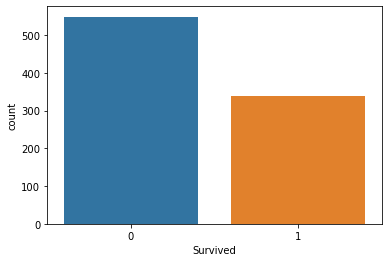

In [61]:
sns.countplot(data=df,x='Survived')

# Model creation

In [62]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [64]:
X = pd.get_dummies(X)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101,stratify=y)

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [79]:
from sklearn.pipeline import make_pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [80]:
NB = GaussianNB()
NB.fit(scaled_X_train, y_train)
y_pred = NB.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       177
           1       0.68      0.77      0.72        90

    accuracy                           0.80       267
   macro avg       0.77      0.79      0.78       267
weighted avg       0.81      0.80      0.80       267



Counter({0: 165, 1: 102})

In [81]:
RFC = RandomForestClassifier()
RFC.fit(scaled_X_train, y_train)
y_pred = RFC.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       178
           1       0.67      0.76      0.71        89

    accuracy                           0.79       267
   macro avg       0.77      0.79      0.78       267
weighted avg       0.80      0.79      0.80       267



Counter({0: 165, 1: 102})

In [82]:
SVM = SVC()
SVM.fit(scaled_X_train, y_train)
y_pred = SVM.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       187
           1       0.62      0.79      0.69        80

    accuracy                           0.79       267
   macro avg       0.76      0.79      0.77       267
weighted avg       0.81      0.79      0.80       267



Counter({0: 165, 1: 102})

In [83]:
DTC = DecisionTreeClassifier()
DTC.fit(scaled_X_train, y_train)
y_pred = DTC.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       179
           1       0.66      0.76      0.71        88

    accuracy                           0.79       267
   macro avg       0.76      0.78      0.77       267
weighted avg       0.80      0.79      0.79       267



Counter({0: 165, 1: 102})

In [84]:
KNN = KNeighborsClassifier()
KNN.fit(scaled_X_train, y_train)
y_pred = KNN.predict(scaled_X_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))
Counter(y_test)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       175
           1       0.67      0.74      0.70        92

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.77       267
weighted avg       0.79      0.78      0.79       267



Counter({0: 165, 1: 102})

In [85]:
len(X_test)

267

In [70]:
from collections import Counter

In [87]:
Counter(df['SibSp'])

Counter({1: 209, 0: 606, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7})